### HANDWRITTEN EQUATION SOLVER USING CNN by TITHI DEB

##### Explanation
* Import the libraries.
* Load the dataset.
* Preprocessing the Data.
* Then Building the CNN model.
* Then we trainthe model.
* Lastly we test the model.

##### IMPORTING LIBRARIES 

In [85]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

##### LOADING THE DATASET

In [86]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [87]:
data=[]

In [89]:
# Assign '-' = 10
data=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\!\\')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

1300


In [90]:
# Assign + = 11
data11=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\+\\')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

26412


In [91]:
data0=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\0\\')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

33326


In [92]:
data1=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\1\\')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

59846


In [93]:
data2=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\2\\')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

85987


In [94]:
data3=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\3\\')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

96896


In [95]:
data4=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\4\\')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

104292


In [96]:
data5=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\5\\')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

107837


In [97]:
data6=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\6\\')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

110955


In [98]:
data7=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\7\\')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

113864


In [99]:
data8=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\8\\')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

116932


In [100]:
data9=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\9\\')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

120669


In [101]:
data12=load_images_from_folder('Desktop\ML PROJECTS\Handwritten Equation Slover USing CNN\extracted\\times\\')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

123920


In [102]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

In [103]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [104]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [105]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36,146,255,146,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,150,241,123,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,64,191,191,64,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,132,241,105,...,0,0,0,0,0,0,0,0,0,0
6,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [107]:
labels=np.array(labels)

In [108]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [109]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [111]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36,146,255,146,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,32,150,241,123,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,64,191,191,64,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,132,241,105,...,0,0,0,0,0,0,0,0,0,0
6,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,255,218,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,232,132,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df_train.shape

(123920, 784)

In [113]:
temp=df_train.to_numpy()

In [114]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [115]:
temp.shape[0]

123920

In [116]:
X_train.shape

(123920, 28, 28, 1)

In [117]:
l=[]
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [118]:
np.random.seed(7)

In [119]:
X_train.shape

(123920, 28, 28, 1)

### Building the model

In [120]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [121]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
from keras.models import model_from_json

In [123]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
620/620 [==============================] - 18s 28ms/step - loss: 0.5222 - accuracy: 0.8705
Epoch 2/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0958 - accuracy: 0.9722
Epoch 3/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0583 - accuracy: 0.9826
Epoch 4/10
620/620 [==============================] - 16s 27ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 5/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 6/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 7/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 8/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 9/10
620/620 [==============================] - 17s 27ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 10/10
620/620 [==============================] - 17s 27ms/step - loss: 0.016

In [124]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [125]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [139]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

##### TESTING THE MODEL

In [240]:
import cv2
import numpy as np
img = cv2.imread('Desktop\\ML PROJECTS\\Handwritten Equation Slover USing CNN\\d.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[198, 198, 199, ..., 198, 198, 198],
       [196, 197, 197, ..., 198, 198, 198],
       [195, 195, 196, ..., 198, 198, 198],
       ...,
       [197, 196, 196, ..., 198, 198, 198],
       [196, 196, 195, ..., 198, 198, 198],
       [196, 195, 195, ..., 199, 198, 198]], dtype=uint8)

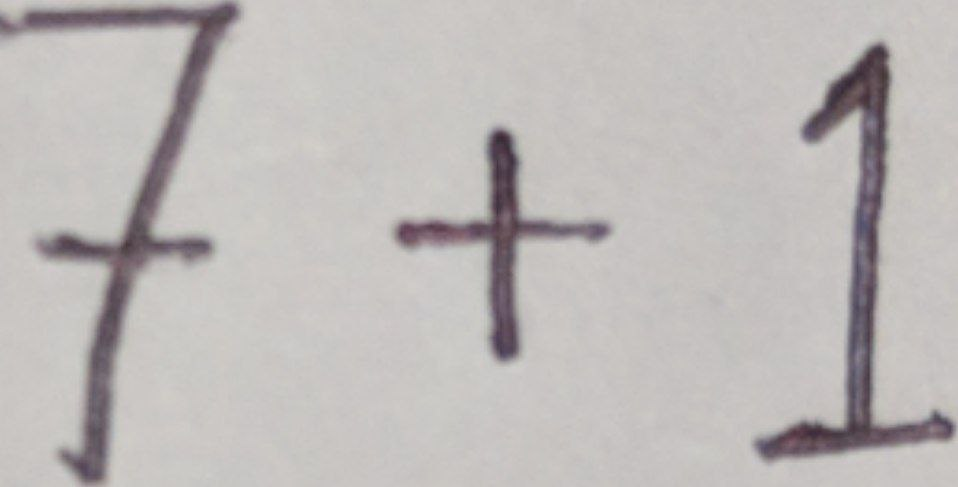

In [241]:
from IPython import display
display.Image('Desktop\\ML PROJECTS\\Handwritten Equation Slover USing CNN\\d.jpg',width=360)

In [242]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

10
[[0, 17, 17, 16], [24, 4, 213, 479], [397, 130, 211, 230], [757, 44, 197, 415], [856, 353, 4, 10], [859, 351, 3, 3], [860, 247, 4, 3], [867, 183, 3, 3], [870, 121, 3, 4], [929, 427, 6, 6]]
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]
8
[[24, 4, 213, 479], [397, 130, 211, 230], [757, 44, 197, 415]]


In [243]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    elif(result[0]==11):
        s=s+'+'
    elif(result[0]==12):
        s=s+'*'
    elif(result[0]==0):
        s=s+'0'
    elif(result[0]==1):
        s=s+'1'
    elif(result[0]==2):
        s=s+'2'
    elif(result[0]==3):
        s=s+'3'
    elif(result[0]==4):
        s=s+'4'
    elif(result[0]==5):
        s=s+'5'
    elif(result[0]==6):
        s=s+'6'
    elif(result[0]==7):
        s=s+'7'
    elif(result[0]==8):
        s=s+'8'
    elif(result[0]==9):
        s=s+'9'
        
print(s)

1/1 [==============================] - 0s 17ms/step
7+1


In [244]:
eval(s)

8